# Noteable Trends
- As latitude in the northern hemisphere increases from 0 to 80 the max temperature for that city decreases. This relationship has a r-squared value of .594.
- As latitude in the southern hemisphere increases from -50 to 0 the max temperature for that city increases. This relationship has a r-squared value of .655.
- The realtionship between city latitude and humidity has no realtionship.
- The realtionship between city latitude and cloudiness has no realtionship.
- The realtionship between city latitude and wind speed has no realtionship.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

from API_keys import open_weather_api
# from API_keys import google_api_key

from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

In [3]:
# API Calls to get the data

# Setting the units to Fahrenheit
units = 'imperial'

# Creating empty lists to hold the city data
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
request_count = 0

# Looping throught the list of citites to get city data
for city in cities:
    request_count += 1
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={open_weather_api}"
    response = requests.get(url)
    data = response.json()
    try:
        name.append(data['name'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        print(f"Resquest number {request_count}, {city}")
    except KeyError:
        print(f"Request number {request_count}, {city} has no data")
        pass


Resquest number 1, berlevag
Resquest number 2, ushuaia
Resquest number 3, rikitea
Resquest number 4, mar del plata
Resquest number 5, mataura
Resquest number 6, grand gaube
Resquest number 7, corrales
Resquest number 8, san cristobal
Resquest number 9, hermanus
Resquest number 10, bambous virieux
Resquest number 11, sandovo
Resquest number 12, novonukutskiy
Resquest number 13, petropavlovskoye
Resquest number 14, vaini
Resquest number 15, vestmanna
Resquest number 16, saldanha
Resquest number 17, esna
Request number 18, sentyabrskiy has no data
Resquest number 19, tamiahua
Request number 20, belushya guba has no data
Request number 21, qabis has no data
Resquest number 22, korcula
Resquest number 23, axim
Resquest number 24, port elizabeth
Resquest number 25, ciudad bolivar
Resquest number 26, bluff
Resquest number 27, albany
Resquest number 28, mahebourg
Resquest number 29, havelock
Resquest number 30, bonga
Resquest number 31, khatanga
Resquest number 32, rudbar
Resquest number 33, m

Resquest number 267, dukat
Resquest number 268, laguna
Resquest number 269, mount isa
Request number 270, bur gabo has no data
Resquest number 271, pingshan
Resquest number 272, angoche
Resquest number 273, murwara
Resquest number 274, bahile
Resquest number 275, arvika
Resquest number 276, gornyak
Resquest number 277, beipiao
Resquest number 278, chalus
Resquest number 279, blyth
Resquest number 280, puerto del rosario
Resquest number 281, la palma
Resquest number 282, tuatapere
Resquest number 283, kulevcha
Resquest number 284, cayenne
Resquest number 285, kargasok
Resquest number 286, stephenville
Resquest number 287, anadyr
Resquest number 288, pevek
Request number 289, artyk has no data
Resquest number 290, namibe
Resquest number 291, kieta
Resquest number 292, karratha
Resquest number 293, bengkulu
Resquest number 294, chimbarongo
Resquest number 295, margate
Resquest number 296, naze
Resquest number 297, potiskum
Resquest number 298, labytnangi
Resquest number 299, severnyy
Resq

Resquest number 532, rio gallegos
Resquest number 533, diapaga
Request number 534, naftah has no data
Resquest number 535, nosy varika
Resquest number 536, gawler
Request number 537, ituni has no data
Resquest number 538, broome
Resquest number 539, verkhnevilyuysk
Resquest number 540, churapcha
Resquest number 541, san vicente
Resquest number 542, goodlettsville
Resquest number 543, teahupoo
Resquest number 544, petropavlovsk-kamchatskiy
Resquest number 545, brazzaville
Resquest number 546, starkville
Resquest number 547, golden
Resquest number 548, buin
Resquest number 549, san francisco
Resquest number 550, lata
Resquest number 551, mingshui
Resquest number 552, el alto
Resquest number 553, araouane
Resquest number 554, sibu
Resquest number 555, vanavara
Resquest number 556, cairns
Resquest number 557, vangaindrano
Resquest number 558, kitimat
Resquest number 559, marneuli
Resquest number 560, pasighat
Resquest number 561, visnes
Resquest number 562, dhadar
Resquest number 563, linc

In [4]:
# Creating DF
city_weather_df = pd.DataFrame({
    'City': name,
    'Lat': lat,
    'Lon': lon,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})
city_weather_df.head(10)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berlevåg,70.86,29.09,50.00,66,64,23.04,NO,1591991156
1,Ushuaia,-54.80,-68.30,33.80,86,75,24.16,AR,1591991156
2,Rikitea,-23.12,-134.97,75.60,80,11,19.93,PF,1591991156
3,Mar del Plata,-38.00,-57.56,62.60,45,11,10.29,AR,1591990823
4,Mataura,-46.19,168.86,39.00,90,27,5.01,NZ,1591991157
5,Grand Gaube,-20.01,57.66,70.00,84,1,3.00,MU,1591990821
6,Corrales,35.24,-106.61,89.01,34,5,5.99,US,1591991157
7,San Cristobal,7.77,-72.22,89.60,55,40,11.41,VE,1591990839
8,Hermanus,-34.42,19.23,53.01,76,85,12.26,ZA,1591991157
9,Bambous Virieux,-20.34,57.76,70.00,88,75,8.05,MU,1591990815


In [5]:
# Cleaning df
clean_city_weather_df = city_weather_df[city_weather_df['Humidity'] < 100]
clean_city_weather_df = clean_city_weather_df.rename(columns={'Lat': 'Latitude', 'Lon': 'Longitude'})
clean_city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berlevåg,70.86,29.09,50.0,66,64,23.04,NO,1591991156
1,Ushuaia,-54.80,-68.30,33.8,86,75,24.16,AR,1591991156
2,Rikitea,-23.12,-134.97,75.6,80,11,19.93,PF,1591991156
3,Mar del Plata,-38.00,-57.56,62.6,45,11,10.29,AR,1591990823
4,Mataura,-46.19,168.86,39.0,90,27,5.01,NZ,1591991157


In [6]:
# Output dataframe to a csv
output_path = '/Users/noahsuskin/Desktop/API-Challenge/WeatherPy/output_data/clean_city_data.csv'
clean_city_weather_df.to_csv(output_path)

<Figure size 432x288 with 0 Axes>

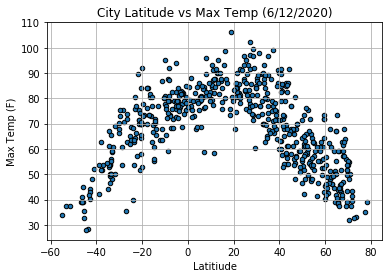

In [7]:
# Creating Temp vs Latittude Scatter Plot

current_time = datetime.datetime.now()
fig = plt.figure()
fig = clean_city_weather_df.plot(kind='scatter', x='Latitude', y='Max Temp', grid=True, edgecolors='k').get_figure()
ax = plt.xlabel('Latitiude')
ax = plt.ylabel('Max Temp (F)')
ax = plt.title(f"City Latitude vs Max Temp ({current_time.month}/{current_time.day}/{current_time.year})")
fig.savefig('/Users/noahsuskin/Desktop/API-Challenge/WeatherPy/output_data/City_Latitude_vs_Max_Temp.png')
plt.show()

# Latitude vs Max Temp Analysis
- The code above creates a scatter plot that shows the correlation between the max temperature for each city and the latitude for each city. According to the chart there is a pattern in the data. The maximum temperature is increasing when latitude increases from -60 to 20. However the maximum temperature decreases while the latiude decreases from 20 to 80.

<Figure size 432x288 with 0 Axes>

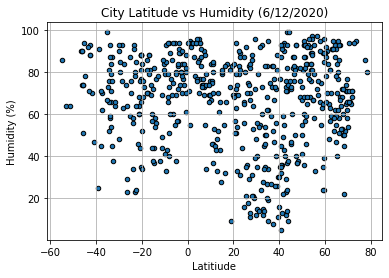

In [8]:
# Humidity vs Latitude Scatter Plot

current_time = datetime.datetime.now()
fig = plt.figure()
fig = clean_city_weather_df.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, edgecolors='k').get_figure()
ax1 = plt.xlabel('Latitiude')
ax1 = plt.ylabel('Humidity (%)')
ax1 = plt.title(f"City Latitude vs Humidity ({current_time.month}/{current_time.day}/{current_time.year})")
fig.savefig('/Users/noahsuskin/Desktop/API-Challenge/WeatherPy/output_data/City_Latitude_vs_Humidity.png')
plt.show()

# Latitude vs Humidty Analysis
- The code above creates a scatter plot that shows the correlation between the latitude of each city and the humidity percent. According to the chart there seems to be a weak correlation between humidity and latitude with the majority of values having a humidity percent above 40.

<Figure size 432x288 with 0 Axes>

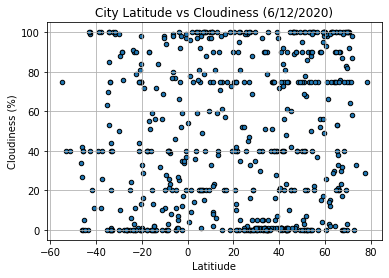

In [9]:
# Cloudiness vs Latitude Scatter Plot

current_time = datetime.datetime.now()
fig = plt.figure()
fig = clean_city_weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, edgecolors='k').get_figure()
ax2 = plt.xlabel('Latitiude')
ax2 = plt.ylabel('Cloudiness (%)')
ax2 = plt.title(f"City Latitude vs Cloudiness ({current_time.month}/{current_time.day}/{current_time.year})")
fig.savefig('/Users/noahsuskin/Desktop/API-Challenge/WeatherPy/output_data/City_Latitude_vs_Cloudiness.png')
plt.show()

# Latitude vs Cloudiness Analysis
- The code above creates a scatter plot that shows the correlation between the latitude of each city and the cloudiness percent. According to the chart there seems to be a weak correlation between cloudiness and latitude.

<Figure size 432x288 with 0 Axes>

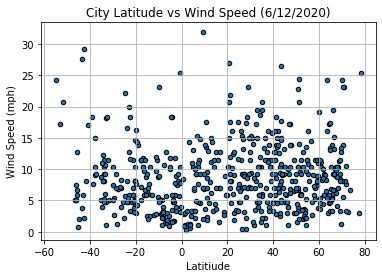

In [10]:
# Wind Speed vs Latitude Scatter Plot

current_time = datetime.datetime.now()
fig = plt.figure()
fig = clean_city_weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', grid=True, edgecolors='k').get_figure()
ax3 = plt.xlabel('Latitiude')
ax3 = plt.ylabel('Wind Speed (mph)')
ax3 = plt.title(f"City Latitude vs Wind Speed ({current_time.month}/{current_time.day}/{current_time.year})")
fig.savefig('/Users/noahsuskin/Desktop/API-Challenge/WeatherPy/output_data/City_Latitude_vs_Wind_Speed.png')
plt.show()

# Latitude vs Humidty Analysis
- The code above creates a scatter plot that shows the correlation between the latitude of each city and the Wind Speed in miles per hour. According to the chart there seems to be a weak correlation between the wind speed and latitude with the majority of values being below 15 mph.

In [11]:
# Creating regression function

def regress_analysis(hemisphere, x, y, title):
    if hemisphere == 'North':
        northern_df = clean_city_weather_df[clean_city_weather_df['Latitude'] >= 0]
    
        x_val = northern_df[x]
        y_val = northern_df[y]
    
        slope, y_int, r, p, std_err = linregress(x_val, y_val)
        regression_fit = slope * x_val + y_int
        
        print(f"The r-squared is {round((r**2),3)}")
        
        northern_df.plot(kind='scatter', x=x, y=y)
        plt.plot(x_val, regression_fit, color='r')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(title)
        plt.show()
    
    elif hemisphere == 'South':
        southern_df = clean_city_weather_df[clean_city_weather_df['Latitude'] < 0]
    
        x_val = southern_df[x]
        y_val = southern_df[y]
    
        slope, y_int, r, p, std_err = linregress(x_val, y_val)
        regression_fit = slope * x_val + y_int
        
        print(f"The r-squared is {round((r**2),3)}")
    
        southern_df.plot(kind='scatter', x=x, y=y)
        plt.plot(x_val, regression_fit, color='r')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(title)
        plt.show()
    
    else:
        print("Please input 'North' or 'South' as the first parameter")

The r-squared is 0.594


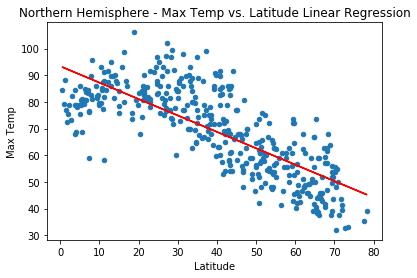

In [12]:
# Northern Hemisphere - Max Temp vs Latitude

regress_analysis('North', 'Latitude', 'Max Temp', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Northern Hemisphere - Max Temp vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .594 which indicates that there is possibly a realtionship between the max temperature and the latitude of a city in the northern hemisphere.

The r-squared is 0.655


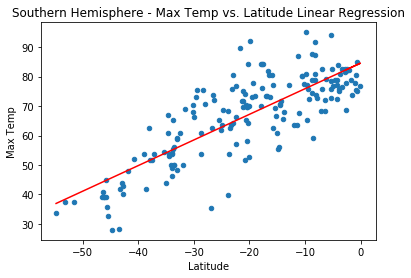

In [13]:
# Southern Hemisphere - Max Temp vs Latitude 

regress_analysis('South', 'Latitude', 'Max Temp', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Southern Hemisphere - Max Temp vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .655 which indicates that there is possibly a realtionship between the max temperature and the latitude of a city in the southern hemisphere.

The r-squared is 0.002


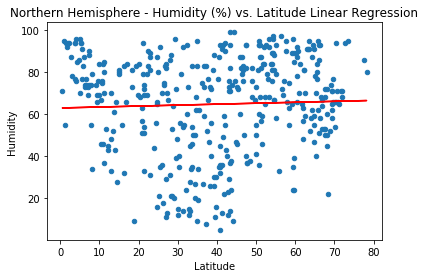

In [14]:
# Northern Hemisphere - Humidity vs Latitude

regress_analysis('North', 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Northern Hemisphere - Humidity vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .002 which indicates that there is a weak realtionship between the humidity and the latitude of a city in the northern hemisphere.

The r-squared is 0.0


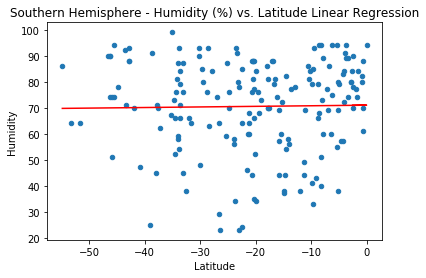

In [15]:
# Southern Hemisphere - Humidity vs Latitude

regress_analysis('South', 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Southern Hemisphere - Humidity vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is 0.0 which indicates that there is a weak realtionship between the humidity and the latitude of a city in the southern hemisphere.


The r-squared is 0.004


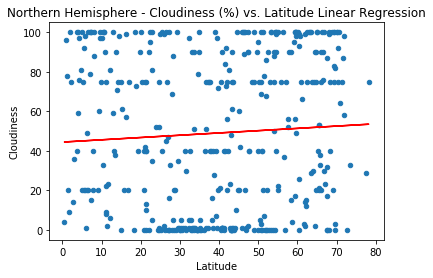

In [16]:
# Northern Hemisphere - Cloudiness vs Latitude

regress_analysis('North', 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Northern Hemisphere - Cloudiness vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .004 which indicates that there is a weak realtionship between the cloudiness and the latitude of a city in the Northern Hemisphere.

The r-squared is 0.001


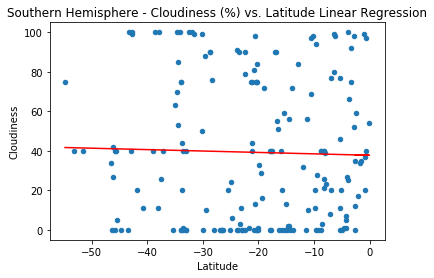

In [17]:
# Southern Hemisphere - Cloudiness vs Latitude

regress_analysis('South', 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Southern Hemisphere - Cloudiness vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .001 which indicates that there is a weak realtionship between the cloudiness and the latitude of a city in the southern hemisphere.

The r-squared is 0.007


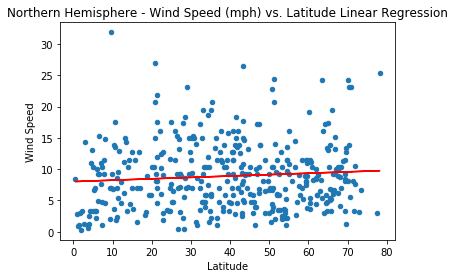

In [18]:
# Northern Hemisphere - Wind Speed vs Latitude

regress_analysis('North', 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Northern Hemisphere - Wind Speed vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .007 which indicates that there is a weak realtionship between the wind speed and the latitude of a city in the northern hemisphere.

The r-squared is 0.06


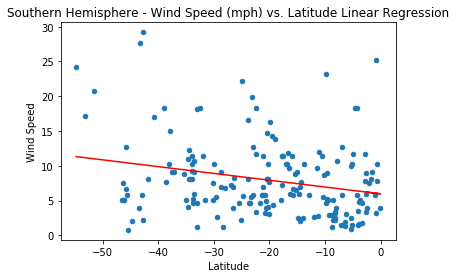

In [19]:
# Southern Hemisphere - Wind Speed vs Latitude

regress_analysis('South', 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Southern Hemisphere - Wind Speed vs Latitude
- The above chart is showing us that the r-squared bewteen the two vairables is .06 which indicates that there is a weak realtionship between the wind speed and the latitude of a city in the southern hemisphere.